# Output variable -> y
y -> Whether the client has subscribed a term deposit or not 
Binomial ("yes" or "no")


In [1]:
#importin libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score , recall_score
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
data = pd.read_csv('bank-full.csv',delimiter=';')
data.head(30)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


<span style="color:blue; font-family: Arial;">no duplicate and missing record found.</span>

In [6]:
#checking for descriptive stats
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<h3 style="color:black; font-family: Arial;"> check and store for all categorical columns</h3>

In [8]:
categorical_col = data.select_dtypes(include=['object','category'])
categorical_col

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
45206,technician,married,tertiary,no,no,no,cellular,nov,unknown,yes
45207,retired,divorced,primary,no,no,no,cellular,nov,unknown,yes
45208,retired,married,secondary,no,no,no,cellular,nov,success,yes
45209,blue-collar,married,secondary,no,no,no,telephone,nov,unknown,no


<h3 style="color:black; font-family: Arial;"> Using Label encoder to convert 'categorical_col' into int</h3>

In [9]:
laenc = LabelEncoder()

for col in categorical_col:
    data[col] = laenc.fit_transform(data[col])
    print(f"Encoded values for {col}:")
    print(dict(zip(laenc.classes_, laenc.transform(laenc.classes_))))
    print()


Encoded values for job:
{'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}

Encoded values for marital:
{'divorced': 0, 'married': 1, 'single': 2}

Encoded values for education:
{'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}

Encoded values for default:
{'no': 0, 'yes': 1}

Encoded values for housing:
{'no': 0, 'yes': 1}

Encoded values for loan:
{'no': 0, 'yes': 1}

Encoded values for contact:
{'cellular': 0, 'telephone': 1, 'unknown': 2}

Encoded values for month:
{'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}

Encoded values for poutcome:
{'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}

Encoded values for y:
{'no': 0, 'yes': 1}



In [46]:
to_drop = ['month','default']

In [47]:
data.drop(columns=to_drop, inplace=True)

In [48]:
data

,age,job,marital,education,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,2143,1,0,2,5,261,1,-1,0,3,0
1,44,9,2,1,29,1,0,2,5,151,1,-1,0,3,0
2,33,2,1,1,2,1,1,2,5,76,1,-1,0,3,0
3,47,1,1,3,1506,1,0,2,5,92,1,-1,0,3,0
4,33,11,2,3,1,0,0,2,5,198,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,9,1,2,825,0,0,0,17,977,3,-1,0,3,1
45207,71,5,0,0,1729,0,0,0,17,456,2,-1,0,3,1
45208,72,5,1,1,5715,0,0,0,17,1127,5,184,3,2,1
45209,57,1,1,1,668,0,0,1,17,508,4,-1,0,3,0


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   balance    45211 non-null  int64
 5   housing    45211 non-null  int32
 6   loan       45211 non-null  int32
 7   contact    45211 non-null  int32
 8   day        45211 non-null  int64
 9   duration   45211 non-null  int64
 10  campaign   45211 non-null  int64
 11  pdays      45211 non-null  int64
 12  previous   45211 non-null  int64
 13  poutcome   45211 non-null  int32
 14  y          45211 non-null  int32
dtypes: int32(8), int64(7)
memory usage: 3.8 MB


<span style="color:blue; font-family: Arial;">all obj dtypes have been converted into int.</span>

In [51]:
X = data.iloc[:,1:]
Y = data['y']

In [52]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2,random_state=1)

# Model Building
*<span style="color:black; font-family: Arial;">Logistic Regressor with parameters</span>*

_<span style="color:black; font-family: Arial;">penalty = l1 since it will also work as feature selection by srinking the feature with non significant slope</span>_

_<span style="color:black; font-family: Arial;">solver = Algos to use for optimization i am using liblinear since liblinear and saga are the only solver that support l1 penalty</span>_

_<span style="color:black; font-family: Arial;">C = Strength of regularization
</span>_

In [17]:
lgr = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lgr.fit(xtrain,ytrain)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [18]:
lgr.score(xtest,ytest)

0.8877584872276899

In [21]:
ypred = lgr.predict(xtest)


# Evaluation

In [22]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      7952
           1       0.60      0.21      0.31      1091

    accuracy                           0.89      9043
   macro avg       0.75      0.60      0.63      9043
weighted avg       0.86      0.89      0.86      9043



Text(158.22222222222223, 0.5, 'Predicted Values')

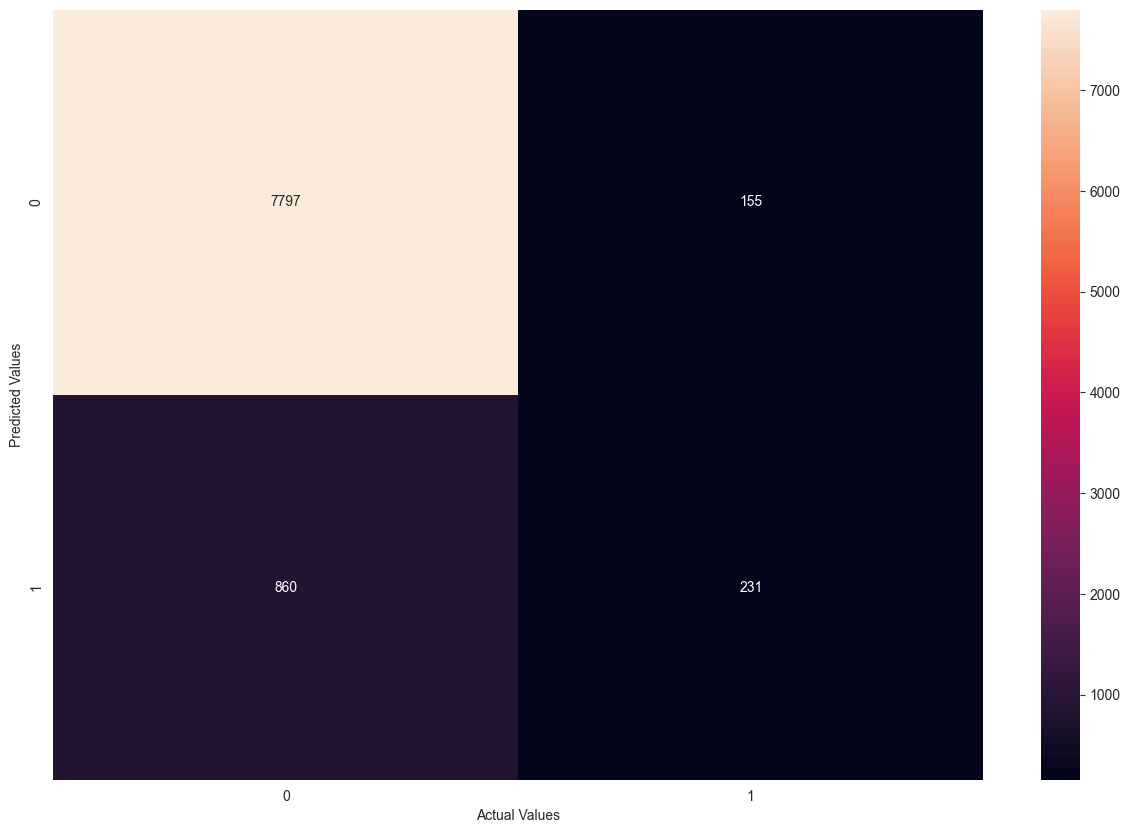

In [28]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.4g')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

<span style="color:blue; font-family: Arial;">Conclusion: high amount of False positive </span>

# Threshold Selection

In [29]:
proba = lgr.predict_proba(xtest)[:,1]
proba

array([0.01651763, 0.03505222, 0.06511529, ..., 0.014803  , 0.00591832,
       0.03572729])

In [30]:
fpr,tpr,threshold = roc_curve(ytest,proba)
auc = roc_auc_score(ytest,proba)

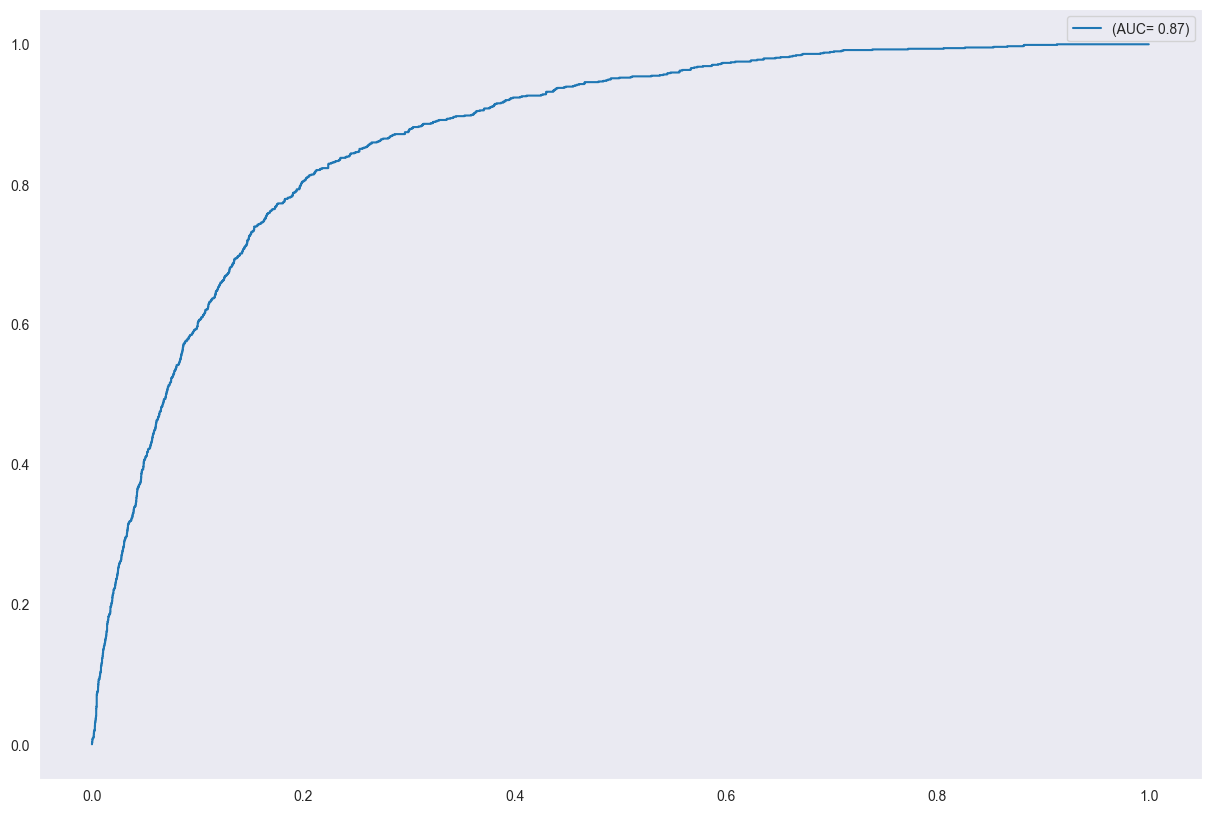

In [31]:
plt.plot(fpr,tpr, label = '(AUC= %0.2f)'%auc)
plt.grid()
plt.legend()

# Select best threshold value using accuracy metrics

In [32]:
accuracy = []

for i in threshold:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [33]:
thresh_sel = pd.DataFrame({
    'Threshold' : threshold,
    'Accuracy' :  accuracy
})

In [35]:
thresh_sel.sort_values(by='Accuracy' , ascending=False)

,Threshold,Accuracy
183,0.492192,0.887980
180,0.495596,0.887758
225,0.454098,0.887758
179,0.497803,0.887758
178,0.498694,0.887758
...,...,...
1432,0.011858,0.224151
1433,0.011832,0.224041
1434,0.009846,0.197058
1435,0.009834,0.196948


In [42]:
ypred = binarize([proba], threshold=0.454098)[0]

In [43]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94      7952
           1       0.58      0.25      0.35      1091

    accuracy                           0.89      9043
   macro avg       0.74      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043



<Axes: >

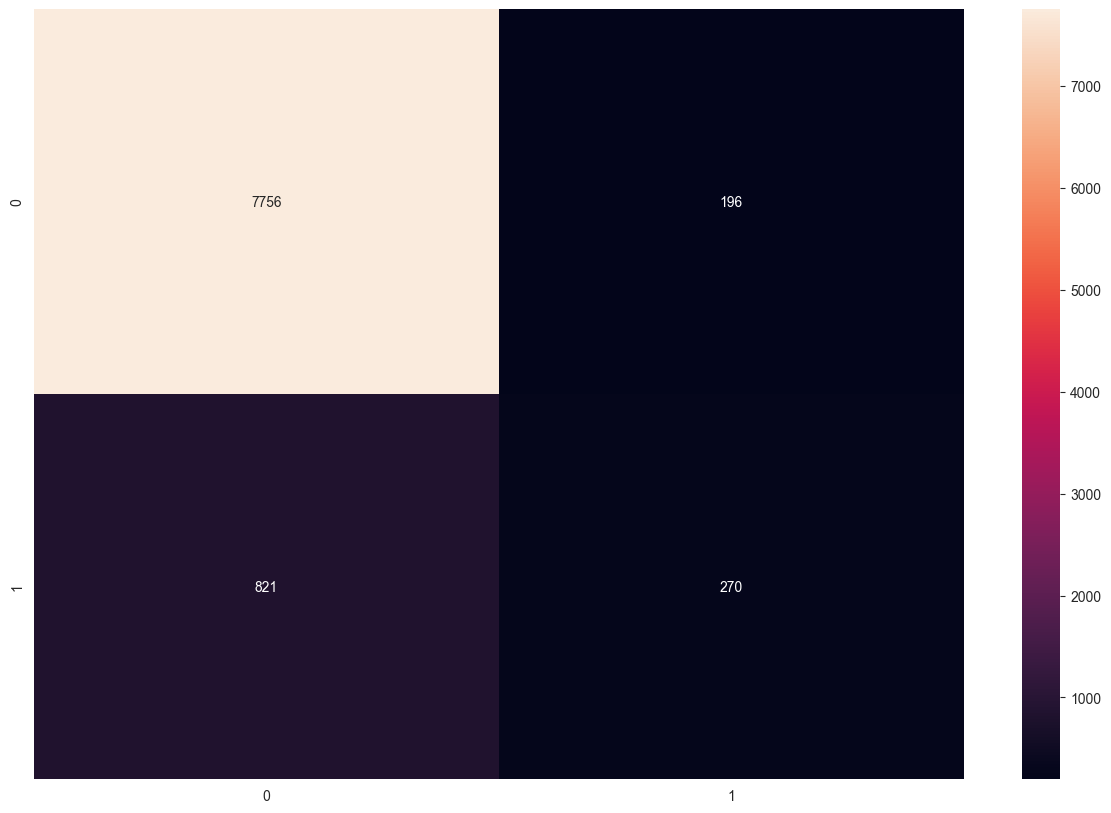

In [39]:
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,fmt='0.4g')